In [1]:
import pandas as pd
df = pd.read_csv('Pizza_Sale - pizza_sales.csv')
df


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [2]:
df['pizza_name_id'].value_counts()

pizza_name_id
big_meat_s        1811
thai_ckn_l        1363
five_cheese_l     1358
four_cheese_l     1272
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

In [3]:
df.isna().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [4]:
df.loc[df['pizza_name'].isna()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
688,689,303,pepperoni_s,1,5/1/2015,20:02:51,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",NaN
689,690,304,hawaiian_s,1,5/1/2015,20:07:58,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",NaN
690,691,304,mexicana_l,1,5/1/2015,20:07:58,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",NaN
691,692,305,pepperoni_l,1,5/1/2015,20:35:40,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",NaN
692,693,305,sicilian_s,1,5/1/2015,20:35:40,12.25,12.25,S,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",NaN
693,694,305,spicy_ital_m,1,5/1/2015,20:35:40,16.50,16.50,M,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",NaN
694,695,306,big_meat_s,1,5/1/2015,20:37:40,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",NaN


In [5]:
df.iloc[688,11]

nan

In [6]:
#Create a mapping dictionary which helps to fill the null values in the pizza_names.
mapping = (
    df[df['pizza_name'].notna()]
    .groupby(['pizza_ingredients','pizza_name_id'])['pizza_name']
    .agg(lambda x:x.mode()[0] if not x.mode().empty else None)
    
)

In [7]:
mapping

pizza_ingredients                                                                            pizza_name_id
?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic                    calabrese_l             The Calabrese Pizza
                                                                                             calabrese_m             The Calabrese Pizza
                                                                                             calabrese_s             The Calabrese Pizza
Bacon, Pepperoni, Italian Sausage, Chorizo Sausage                                           big_meat_s               The Big Meat Pizza
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce          bbq_ckn_l        The Barbecue Chicken Pizza
                                                                                                                         ...            
Tomatoes, Anchovies, Green Olives, Red Onions, Garlic                  

In [8]:
mask = df['pizza_name'].isna()
df.loc[mask,'pizza_name'] = df[mask].set_index(['pizza_ingredients','pizza_name_id']).index.map(mapping)

In [9]:
df.isna().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            0
dtype: int64

In [10]:
df[df['pizza_ingredients'].isna()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
580,581,254,five_cheese_l,1,4/1/2015,22:22:13,18.50,18.50,L,Veggie,NaN,The Five Cheese Pizza
581,582,255,five_cheese_l,1,5/1/2015,11:23:35,18.50,18.50,L,Veggie,NaN,The Five Cheese Pizza
582,583,255,green_garden_m,1,5/1/2015,11:23:35,16.00,16.00,M,Veggie,NaN,The Green Garden Pizza
583,584,255,hawaiian_l,1,5/1/2015,11:23:35,16.50,16.50,L,Classic,NaN,The Hawaiian Pizza
584,585,255,spinach_fet_m,1,5/1/2015,11:23:35,16.00,16.00,M,Veggie,NaN,The Spinach and Feta Pizza
585,586,256,pep_msh_pep_l,1,5/1/2015,11:56:06,17.50,17.50,L,Classic,NaN,"The Pepperoni, Mushroom, and Peppers Pizza"
586,587,257,cali_ckn_l,1,5/1/2015,11:59:04,20.75,20.75,L,Chicken,NaN,The California Chicken Pizza
630,631,277,four_cheese_m,1,5/1/2015,15:41:50,14.75,14.75,M,Veggie,NaN,The Four Cheese Pizza
631,632,278,ital_veggie_m,1,5/1/2015,15:49:21,16.75,16.75,M,Veggie,NaN,The Italian Vegetables Pizza
632,633,278,southw_ckn_l,1,5/1/2015,15:49:21,20.75,20.75,L,Chicken,NaN,The Southwest Chicken Pizza


In [11]:
# Mapping dictionary to fill the null values in the Pizza ingredients 
ing_mapping = (
    df[df['pizza_ingredients'].notna()]
    .groupby(['pizza_name','pizza_category'])['pizza_ingredients']
    .agg(lambda x:x.mode()[0] if not x.mode().empty else None)
)

In [12]:
ing_mapping

pizza_name                                  pizza_category
The Barbecue Chicken Pizza                  Chicken           Barbecued Chicken, Red Peppers, Green Peppers,...
The Big Meat Pizza                          Classic           Bacon, Pepperoni, Italian Sausage, Chorizo Sau...
The Brie Carre Pizza                        Supreme           Brie Carre Cheese, Prosciutto, Caramelized Oni...
The Calabrese Pizza                         Supreme           ?duja Salami, Pancetta, Tomatoes, Red Onions, ...
The California Chicken Pizza                Chicken           Chicken, Artichoke, Spinach, Garlic, Jalapeno ...
The Chicken Alfredo Pizza                   Chicken           Chicken, Red Onions, Red Peppers, Mushrooms, A...
The Chicken Pesto Pizza                     Chicken           Chicken, Tomatoes, Red Peppers, Spinach, Garli...
The Classic Deluxe Pizza                    Classic           Pepperoni, Mushrooms, Red Onions, Red Peppers,...
The Five Cheese Pizza                       V

In [13]:
mask_ing = df['pizza_ingredients'].isna()
df.loc[mask_ing,'pizza_ingredients'] = df[mask_ing].set_index(['pizza_name','pizza_category']).index.map(ing_mapping)

In [14]:
df.iloc[634,10]

'Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce'

In [15]:
df[df['pizza_category'].isna()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
426,427,181,mexicana_l,1,3/1/2015,18:49:32,20.25,20.25,L,NaN,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
427,428,182,brie_carre_s,1,3/1/2015,18:50:10,23.65,23.65,S,NaN,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
428,429,182,peppr_salami_l,1,3/1/2015,18:50:10,20.75,20.75,L,NaN,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
429,430,183,napolitana_m,1,3/1/2015,18:54:55,16.00,16.00,M,NaN,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
430,431,183,spin_pesto_l,1,3/1/2015,18:54:55,20.75,20.75,L,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
431,432,183,spin_pesto_s,1,3/1/2015,18:54:55,12.50,12.50,S,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
432,433,184,hawaiian_l,1,3/1/2015,18:59:05,16.50,16.50,L,NaN,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
433,434,185,sicilian_m,1,3/1/2015,19:08:33,16.25,16.25,M,NaN,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
434,435,185,spin_pesto_s,1,3/1/2015,19:08:33,12.50,12.50,S,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
435,436,186,mexicana_l,1,3/1/2015,19:36:00,20.25,20.25,L,NaN,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [16]:
cat_mapping = (
    df[df['pizza_category'].notna()]
    .groupby(['pizza_name','pizza_ingredients'])['pizza_category']
    .agg(lambda x:x.mode()[0] if not x.mode().empty else None)
)

In [17]:
cat_mapping

pizza_name                                  pizza_ingredients                                                                                
The Barbecue Chicken Pizza                  Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  Chicken
The Big Meat Pizza                          Bacon, Pepperoni, Italian Sausage, Chorizo Sausage                                                   Classic
The Brie Carre Pizza                        Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic                              Supreme
The Calabrese Pizza                         ?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic                            Supreme
The California Chicken Pizza                Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  Chicken
The Chicken Alfredo Pizza                   Chicken, Red Onions, Red Peppers, Mushrooms, Asia

In [18]:
mask_cat = df['pizza_category'].isna()
df.loc[mask_cat,'pizza_category'] = df[mask_cat].set_index(['pizza_name','pizza_ingredients']).index.map(cat_mapping)

In [19]:
df.isna().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
dtype: int64

In [20]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [21]:
nameid_mapping =(
    df[df['pizza_name_id'].notna()]
    .groupby(['pizza_name','pizza_size'])['pizza_name_id']
    .agg(lambda x:x.mode()[0] if not x.mode().empty else None)
)

In [22]:
nameid_mapping

pizza_name                         pizza_size
The Barbecue Chicken Pizza         L                bbq_ckn_l
                                   M                bbq_ckn_m
                                   S                bbq_ckn_s
The Big Meat Pizza                 S               big_meat_s
The Brie Carre Pizza               S             brie_carre_s
                                                     ...     
The Thai Chicken Pizza             M               thai_ckn_m
                                   S               thai_ckn_s
The Vegetables + Vegetables Pizza  L             veggie_veg_l
                                   M             veggie_veg_m
                                   S             veggie_veg_s
Name: pizza_name_id, Length: 91, dtype: object

In [23]:
nameid_mask = df['pizza_name_id'].isna()
df.loc[nameid_mask,'pizza_name_id'] = df[nameid_mask].set_index(['pizza_name','pizza_size']).index.map(nameid_mapping)

In [24]:
df[df['total_price'].isna()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
781,782,341,bbq_ckn_m,1,6/1/2015,15:35:47,16.75,NaN,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
782,783,341,pepperoni_s,1,6/1/2015,15:35:47,9.75,NaN,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
783,784,342,sicilian_l,1,6/1/2015,15:44:12,20.25,NaN,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
784,785,342,southw_ckn_l,1,6/1/2015,15:44:12,20.75,NaN,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
785,786,343,five_cheese_l,1,6/1/2015,15:45:37,18.50,NaN,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
786,787,343,four_cheese_m,1,6/1/2015,15:45:37,14.75,NaN,M,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
787,788,344,ital_cpcllo_m,1,6/1/2015,16:01:11,16.00,NaN,M,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza


In [25]:
total_price = (
    df[df['total_price'].notna()]
    .groupby(['pizza_name_id','quantity'])['total_price']
    .agg(lambda x:x.mode()[0] if not x.mode().empty else None)
)

In [26]:
total_price

pizza_name_id  quantity
bbq_ckn_l      1           20.75
               2           41.50
               3           62.25
bbq_ckn_m      1           16.75
               2           33.50
                           ...  
veggie_veg_l   2           40.50
veggie_veg_m   1           16.00
               2           32.00
veggie_veg_s   1           12.00
               2           24.00
Name: total_price, Length: 191, dtype: float64

In [27]:
mask_price = df['total_price'].isna()
df.loc[mask_price,'total_price'] = df[mask_price].set_index(['pizza_name_id','quantity']).index.map(total_price)

In [28]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [29]:
da = df.copy()

In [30]:
da.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [31]:
# We only need PizzanameID,Quantity,Orderdate to know the futer sales , so we drop all other columns which are not necessary .
drop_columns = ['pizza_id', 'order_id',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name']
da.drop(columns=drop_columns,inplace=True)

In [32]:
da

,pizza_name_id,quantity,order_date
0,hawaiian_m,1,1/1/2015
1,classic_dlx_m,1,1/1/2015
2,five_cheese_l,1,1/1/2015
3,ital_supr_l,1,1/1/2015
4,mexicana_m,1,1/1/2015
...,...,...,...
48615,ckn_alfredo_m,1,31-12-2015
48616,four_cheese_l,1,31-12-2015
48617,napolitana_s,1,31-12-2015
48618,mexicana_l,1,31-12-2015


In [33]:
da.dtypes

pizza_name_id    object
quantity          int64
order_date       object
dtype: object

In [34]:
da['order_date']

0          1/1/2015
1          1/1/2015
2          1/1/2015
3          1/1/2015
4          1/1/2015
            ...    
48615    31-12-2015
48616    31-12-2015
48617    31-12-2015
48618    31-12-2015
48619    31-12-2015
Name: order_date, Length: 48620, dtype: object

**FEATURE ENGINEERING**

In [35]:
#Now we are going to extract the week,month and day column from the order date column
da['order_date'] = pd.to_datetime(da['order_date'],format='mixed',dayfirst=True,errors='coerce')


In [36]:
da['dayname'] = da['order_date'].dt.day_name()
da['Month'] = da['order_date'].dt.month
da['day_of_week'] = da['order_date'].dt.day_of_week
da['Week_of_year'] = da['order_date'].dt.isocalendar().week

In [37]:
da['day'] = da['order_date'].dt.day_of_year

In [38]:
da.dtypes

pizza_name_id            object
quantity                  int64
order_date       datetime64[ns]
dayname                  object
Month                     int32
day_of_week               int32
Week_of_year             UInt32
day                       int32
dtype: object

In [39]:
da['order_date'] = pd.to_datetime(da['order_date'])

In [40]:
import holidays
holiday = holidays.UnitedStates(years=2015,observed=True)
da['is_holiday'] = da['order_date'].dt.normalize().isin(holiday)
da['holiday_name'] = da['order_date'].dt.normalize().map(lambda x:holiday.get(x,'No holiday'))

C:\Users\nambi\AppData\Local\Temp\ipykernel_7624\653059800.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  da['is_holiday'] = da['order_date'].dt.normalize().isin(holiday)


In [41]:
da[da['is_holiday']==True]

,pizza_name_id,quantity,order_date,dayname,Month,day_of_week,Week_of_year,day,is_holiday,holiday_name
0,hawaiian_m,1,2015-01-01,Thursday,1,3,1,1,True,New Year's Day
1,classic_dlx_m,1,2015-01-01,Thursday,1,3,1,1,True,New Year's Day
2,five_cheese_l,1,2015-01-01,Thursday,1,3,1,1,True,New Year's Day
3,ital_supr_l,1,2015-01-01,Thursday,1,3,1,1,True,New Year's Day
4,mexicana_m,1,2015-01-01,Thursday,1,3,1,1,True,New Year's Day
...,...,...,...,...,...,...,...,...,...,...
44138,spinach_supr_m,1,2015-11-26,Thursday,11,3,48,330,True,Thanksgiving Day
44139,ital_cpcllo_l,1,2015-11-26,Thursday,11,3,48,330,True,Thanksgiving Day
44140,ital_supr_l,1,2015-11-26,Thursday,11,3,48,330,True,Thanksgiving Day
44141,sicilian_m,1,2015-11-26,Thursday,11,3,48,330,True,Thanksgiving Day


In [42]:
print("2015-07-04" in holiday)  # Should return True for Independence Day
print(holiday.get("2023-07-04"))

True
Independence Day


In [43]:
da.set_index('order_date')

,pizza_name_id,quantity,dayname,Month,day_of_week,Week_of_year,day,is_holiday,holiday_name
order_date,,,,,,,,,
2015-01-01,hawaiian_m,1,Thursday,1,3,1,1,True,New Year's Day
2015-01-01,classic_dlx_m,1,Thursday,1,3,1,1,True,New Year's Day
2015-01-01,five_cheese_l,1,Thursday,1,3,1,1,True,New Year's Day
2015-01-01,ital_supr_l,1,Thursday,1,3,1,1,True,New Year's Day
2015-01-01,mexicana_m,1,Thursday,1,3,1,1,True,New Year's Day
...,...,...,...,...,...,...,...,...,...
2015-12-31,ckn_alfredo_m,1,Thursday,12,3,53,365,False,No holiday
2015-12-31,four_cheese_l,1,Thursday,12,3,53,365,False,No holiday
2015-12-31,napolitana_s,1,Thursday,12,3,53,365,False,No holiday


In [44]:
da.index

RangeIndex(start=0, stop=48620, step=1)

In [45]:
da['pizza_name_id'].unique()

array(['hawaiian_m', 'classic_dlx_m', 'five_cheese_l', 'ital_supr_l',
       'mexicana_m', 'thai_ckn_l', 'ital_supr_m', 'prsc_argla_l',
       'bbq_ckn_s', 'the_greek_s', 'spinach_supr_s', 'classic_dlx_s',
       'green_garden_s', 'ital_cpcllo_l', 'ital_supr_s', 'mexicana_s',
       'spicy_ital_l', 'spin_pesto_l', 'veggie_veg_s', 'mexicana_l',
       'southw_ckn_l', 'bbq_ckn_l', 'cali_ckn_l', 'cali_ckn_m',
       'pepperoni_l', 'cali_ckn_s', 'ckn_pesto_l', 'big_meat_s',
       'soppressata_l', 'four_cheese_l', 'napolitana_s', 'calabrese_m',
       'four_cheese_m', 'ital_veggie_s', 'mediterraneo_m',
       'peppr_salami_s', 'spinach_fet_l', 'napolitana_l', 'sicilian_l',
       'ital_cpcllo_m', 'southw_ckn_s', 'bbq_ckn_m', 'pepperoni_m',
       'prsc_argla_s', 'sicilian_m', 'veggie_veg_l', 'ckn_alfredo_s',
       'pepperoni_s', 'green_garden_l', 'green_garden_m', 'pep_msh_pep_l',
       'hawaiian_s', 'peppr_salami_m', 'ckn_alfredo_m', 'peppr_salami_l',
       'spin_pesto_s', 'thai_ckn_m'

In [46]:
unique_values = da['pizza_name_id'].unique()
dfs = { val : da[da['pizza_name_id']== val ].copy() for val in unique_values}

In [47]:
# Now we are going to group by the quantity by the week of the year.
weekly_sales={}
for name in dfs.keys():
    weekly_sales[name]=dfs[name].groupby('Week_of_year')['quantity'].sum().reset_index()

In [48]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(da['quantity'])

In [49]:
print('ADF Results: ')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Results: 
ADF Statistic: -54.185055
p-value: 0.000000


In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(da['quantity'],regression='ct')

In [ ]:
print('KPSS Results: ')
print('ADF Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])

**OBSERVATIONS**
* The data is stationary because in adf test we reject null hypothesis and in kpss test we accept the null hypothesis

**TIME SERIES DECOMPOSITION**


In [71]:
daily_sales = da.groupby('day')['quantity'].sum().reset_index()
daily_sales

,day,quantity
0,1,162
1,2,165
2,3,158
3,4,106
4,5,125
...,...,...
353,361,89
354,362,102
355,363,80
356,364,82


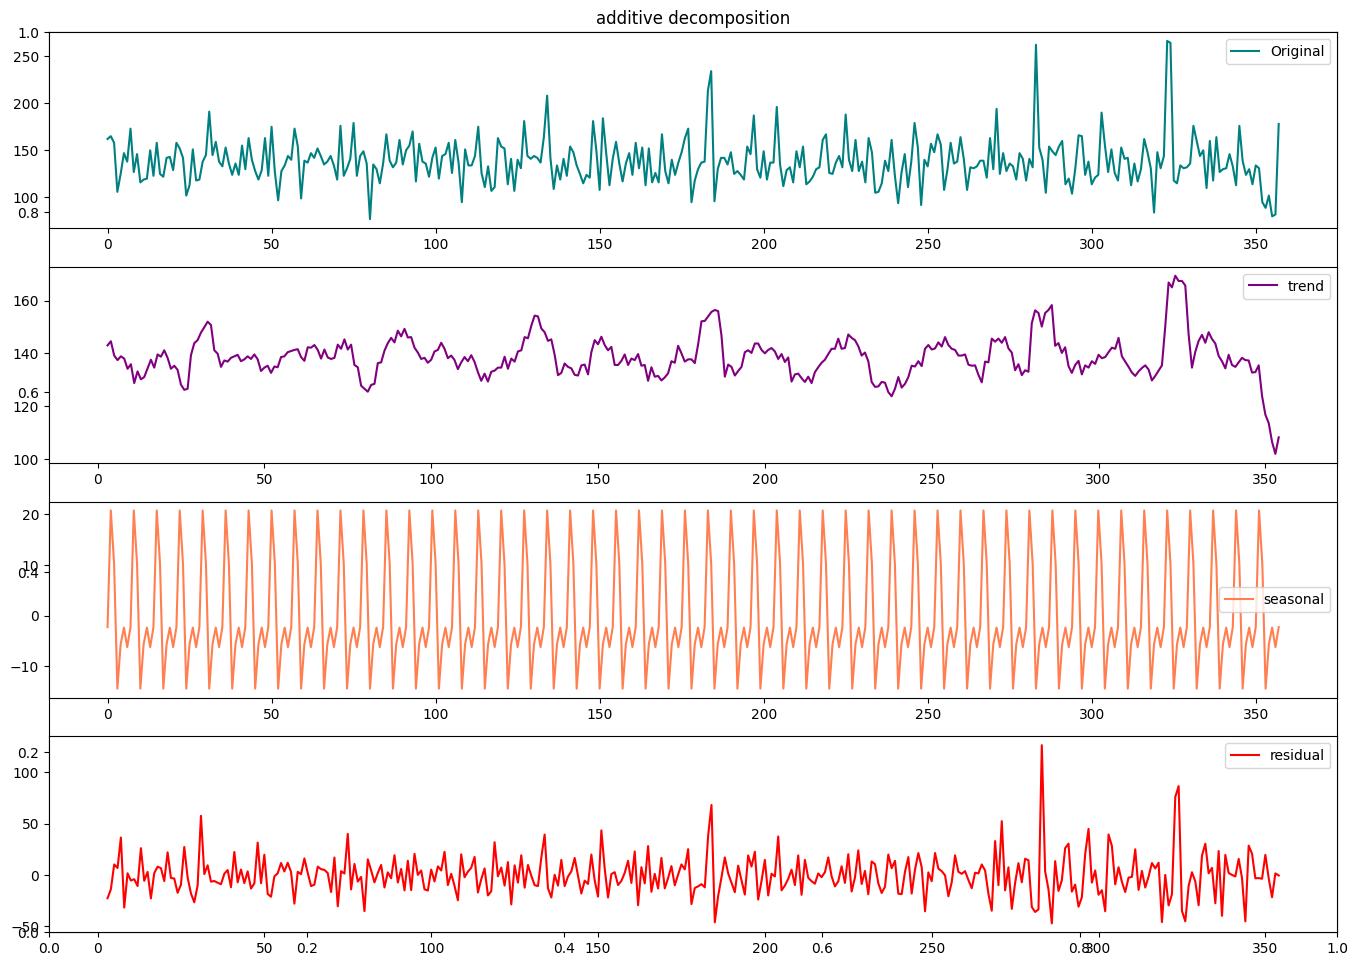

In [72]:
#Seasonal_decompostion
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decompose = seasonal_decompose(daily_sales['quantity'],model="additive",period=7)
trend_additive = additive_decompose.trend
seasonal_additive = additive_decompose.seasonal
residual_additive = additive_decompose.resid

plt.figure(figsize=(14,10))
plt.title('additive decomposition')
plt.subplot(411)
plt.plot(daily_sales['quantity'],label='Original',color='teal')
plt.legend()
plt.subplot(412)
plt.plot(trend_additive,label='trend',color='purple')
plt.legend()
plt.subplot(413)
plt.plot(seasonal_additive,label='seasonal',color='coral')
plt.legend()
plt.subplot(414)
plt.plot(residual_additive,label='residual',color='red')
plt.legend()
plt.tight_layout()
plt.show()

1. Original Series (Top Plot)
Observation: The daily sales fluctuate between roughly 100 to 250 units.

Insight: Sales have visible ups and downs, not completely random — there’s likely a combination of seasonality and occasional spikes.

Business implication: There may be consistent weekly patterns with promotional peaks or events.

2. Trend Component
Observation: The trend line is relatively stable, with slight undulations and a mild dip at the end.

Insight: No strong upward or downward trend across the year.

There’s a mid-year rise and then decline near the end.

Business implication: Sales remain mostly consistent over the year, with small fluctuations—possibly related to marketing events, seasons, or customer behavior.

3. Seasonal Component
Observation: Clear repeating cycles, likely weekly (7-day) seasonality.

Insight : Some days of the week consistently have higher sales (e.g., weekends).

Others have lower performance, possibly weekdays like Monday or Tuesday.

Business implication:

We can plan promotions or staff scheduling around high-sales days.

Consider delivery or campaign boosts on low-sales days.

4. Residual Component
Observation: Most values hover around zero, with a few spikes.

Insight:

Unexplained noise is mostly small, except for some spikes (outliers).

These spikes could indicate unexpected events (festivals, weather, discounts).

Business implication:

Investigate residual spikes for one-off events or anomalies.

If there’s too much noise, forecasting might need smoothing or modeling irregularities.

In [ ]:
#Seasonal_decompostion
from statsmodels.tsa.seasonal import seasonal_decompose
multi_decompose = seasonal_decompose(daily_sales['quantity'],model='multiplicative',period=7)
trend_multi = multi_decompose.trend
seasonal_multi = multi_decompose.seasonal
residual_multi = multi_decompose.resid
plt.figure(figsize=(14,10))
plt.title('multiplicative decomposition')
plt.subplot(411)
plt.plot(daily_sales['quantity'],label='Original',color='teal')
plt.legend()
plt.subplot(412)
plt.plot(trend_multi,label='trend',color='purple')
plt.legend()
plt.subplot(413)
plt.plot(seasonal_multi,label='seasonal',color='coral')
plt.legend()
plt.subplot(414)
plt.plot(residual_multi,label='residual',color='red')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(daily_sales['quantity'],period=7)
result = stl.fit()

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color='green')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='violet')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal',color = 'purple')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual',color='maroon')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**STL DECOMPOSITION INSIGHTS**

1.**Original Series**
Reflects daily fluctuations in sales — this includes regular customer behavior, marketing impact, and unpredictable events.

Sales spikes and dips can result from weekends, holidays, bad weather, or campaigns.

2.**Trend Component**
Observation: The trend is relatively stable with a slight dip near the end of the year.

Implications:

Sales are consistently healthy, indicating customer loyalty and brand strength.

Recent decline could signal:

Post-festival or off-season effect.

Market saturation or competitor offers.

Delivery/logistics problems — worth investigating.

Action: Investigate late-year changes, especially if recurring annually — plan retention or boost strategies.

3.**Seasonal Component**
Observation: Strong regular seasonality — peaks and troughs occur at predictable intervals (possibly weekly).

Implications:

Likely higher sales on weekends (Friday-Sunday), and dips midweek (Monday-Wednesday).

Possibly some monthly spikes around salary days, holidays (e.g., New Year, Independence Day).

Actionable Business Moves:

Staffing: More kitchen/delivery staff on peak days.

Inventory: More raw materials (cheese, dough, toppings) ordered for weekends.

Marketing:

Promote combos or new items midweek to boost dull days.

Push upselling and premium pizzas during weekends.

App and Delivery Optimization: Faster delivery focus during seasonal peaks to ensure customer satisfaction.

4.**Residual Component**
Observation: Some outliers (spikes/dips not explained by trend/seasonality).

Implications:

Could represent flash sales, app downtimes, weather disruptions, or viral marketing events.

Actions:

Positive residuals: Investigate what caused the unexpected surge (e.g., influencer campaign? food aggregator deals?) — replicate it.

Negative residuals: Look for delivery issues, bad reviews, or external factors like rain, events.

Can also help trigger anomaly alerts in real-time systems.



In [ ]:
da.to_csv('sales_data.csv')

In [ ]:
weekly_sales['bbq_ckn_m']

**ARIMA[AUTO REGRESSIVE INTEGRATED MOVING AVERAGE]**

In [ ]:
from pmdarima import auto_arima
models={}
for name in weekly_sales.keys():
    print(f"Fitting model for: {name}")
    stepwise_fit = auto_arima(weekly_sales[name]['quantity'],trace=True,suppress_warnings=True)
    models[name]=stepwise_fit.order

In [ ]:
models.items()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error as MAPE
mape_results_arima = {}
for name in weekly_sales.keys():
    series = weekly_sales[name]['quantity']
    train = series[:-1]
    test = series[-1:]
    model = ARIMA(train,order=models[name])
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    mape = MAPE(test,forecast)
    mape_results_arima[name] = mape*100
    



   

In [ ]:
mape_results_arima

In [ ]:
import json
with open('mape_results_arima.json','w')as f1:
    json.dump(mape_results_arima,f1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
forecast_arima = {}
for name in weekly_sales.keys():
    model = ARIMA(weekly_sales[name]['quantity'],order=models[name])
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    forecast_arima[name] = forecast.iloc[0]

In [ ]:
forecast_arima

In [ ]:
import json
with open('forecast_arima.json','w')as f:
    json.dump(forecast_arima,f)

In [50]:
import json
with open('forecast_arima.json','r')as f1:
    forecasting_results = json.load(f1)

In [51]:
forecasting_results

{'hawaiian_m': 9.113202564237625,
 'classic_dlx_m': 22.28301392105381,
 'five_cheese_l': 20.96527541765601,
 'ital_supr_l': 14.094334498664233,
 'mexicana_m': 7.149143524675125,
 'thai_ckn_l': 26.603768627465207,
 'ital_supr_m': 14.798755822140869,
 'prsc_argla_l': 8.3653796258345,
 'bbq_ckn_s': 9.132070519881982,
 'the_greek_s': 5.7358440345680295,
 'spinach_supr_s': 7.692302699700771,
 'classic_dlx_s': 15.075466682362128,
 'green_garden_s': 11.32074973094628,
 'ital_cpcllo_l': 16.901143873454707,
 'ital_supr_s': 3.698108048270462,
 'mexicana_s': 3.2399932033918084,
 'spicy_ital_l': 20.92452338914099,
 'spin_pesto_l': 4.097193857020428,
 'veggie_veg_s': 8.754711988957947,
 'mexicana_l': 16.35848565356372,
 'southw_ckn_l': 19.1698063299594,
 'bbq_ckn_l': 18.716975991971186,
 'cali_ckn_l': 17.490561123232656,
 'cali_ckn_m': 17.81131576500955,
 'pepperoni_l': 13.735844448929548,
 'cali_ckn_s': 9.415089694440894,
 'ckn_pesto_l': 7.528296913343084,
 'big_meat_s': 36.113202598788476,
 'sopp

In [52]:
import pandas as pd
df = pd.read_csv('Pizza_ingredients - Pizza_ingredients.csv')
df

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [53]:
df.isna().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [54]:
df[df['pizza_name_id']=='hawaiian_s']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN
156,hawaiian_s,The Hawaiian Pizza,Pineapple,15.0
157,hawaiian_s,The Hawaiian Pizza,Mozzarella Cheese,10.0


In [55]:
df[df['pizza_name_id']=='brie_carre_s']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
22,brie_carre_s,The Brie Carre Pizza,Brie Carre Cheese,30.0
23,brie_carre_s,The Brie Carre Pizza,Prosciutto,30.0
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
25,brie_carre_s,The Brie Carre Pizza,Pears,10.0
26,brie_carre_s,The Brie Carre Pizza,Thyme,5.0
27,brie_carre_s,The Brie Carre Pizza,Garlic,5.0


In [56]:
df.loc[24,'Items_Qty_In_Grams']=20

In [57]:
df.loc[149,'Items_Qty_In_Grams']=40

In [58]:
df.loc[152,'Items_Qty_In_Grams']=27

In [59]:
df.loc[155,'Items_Qty_In_Grams']=20

In [60]:
df.isna().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64

In [61]:
df.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [62]:
df['future_quantity(gms)'] = df['pizza_name_id'].map(forecasting_results)*df['Items_Qty_In_Grams']

In [63]:
forecasting_results['bbq_ckn_l']

18.716975991971186

In [ ]:
df

**INVENTORY LIST**

In [65]:
ingredient_quantity = df.groupby('pizza_ingredients')['future_quantity(gms)'].sum().reset_index()

In [66]:
pd.set_option('display.max_rows',64)
ingredient_quantity

,pizza_ingredients,future_quantity(gms)
0,?duja Salami,785.655346
1,Alfredo Sauce,297.540461
2,Anchovies,802.169376
3,Artichokes,2397.542340
4,Arugula,278.310807
5,Asiago Cheese,1360.866004
6,Bacon,9469.997916
7,Barbecue Sauce,506.792301
8,Barbecued Chicken,1472.452376
9,Beef Chuck Roast,3063.374823


In [67]:
ingredient_quantity['future_quantity(kg)'] = ingredient_quantity['future_quantity(gms)']/1000

In [68]:
ingredient_quantity['future_quantity(kg)']= ingredient_quantity['future_quantity(kg)'].round(2)

In [69]:
ingredient_quantity.drop(columns='future_quantity(gms)',inplace=True)

In [70]:
ingredient_quantity

,pizza_ingredients,future_quantity(kg)
0,?duja Salami,0.79
1,Alfredo Sauce,0.30
2,Anchovies,0.80
3,Artichokes,2.40
4,Arugula,0.28
5,Asiago Cheese,1.36
6,Bacon,9.47
7,Barbecue Sauce,0.51
8,Barbecued Chicken,1.47
9,Beef Chuck Roast,3.06


**EXPLORATORY DATA ANALYSIS**


In [ ]:
dfs['bbq_ckn_l'].dtypes

In [ ]:
da

In [ ]:
holiday_sales = da.groupby('holiday_name')['quantity'].sum().reset_index()
holiday_sales.drop(6,inplace=True)

In [ ]:
holiday_sales

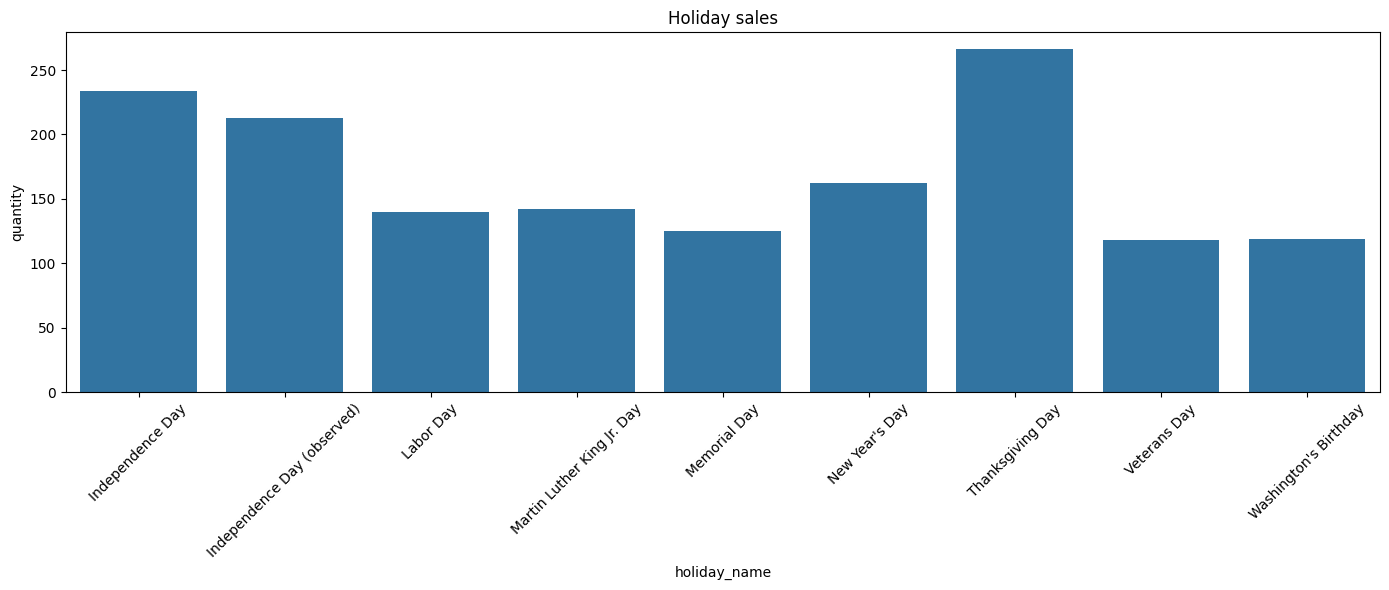

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.barplot(data=holiday_sales,x='holiday_name',y='quantity')
plt.title('Holiday sales')
plt.xticks(rotation=45)
plt.xlabel('holiday_name')
plt.ylabel('quantity')
plt.tight_layout()
plt.show()

**OBSERVATIONS**
* Thanks giving day is the highest sales in pizza quantity followed by Independence day.
* The least sold holiday days are veterans day and washington day.

**Business Implications**
* Stockup inventory,run targeted promotions and ensure operational readiness for the highest sales day.
* The least sold holidays may not need aggressive marketing spend; consider operational cost optimization on these days.

In [ ]:

weekly_sales = da.groupby('Week_of_year')['quantity'].sum().reset_index()


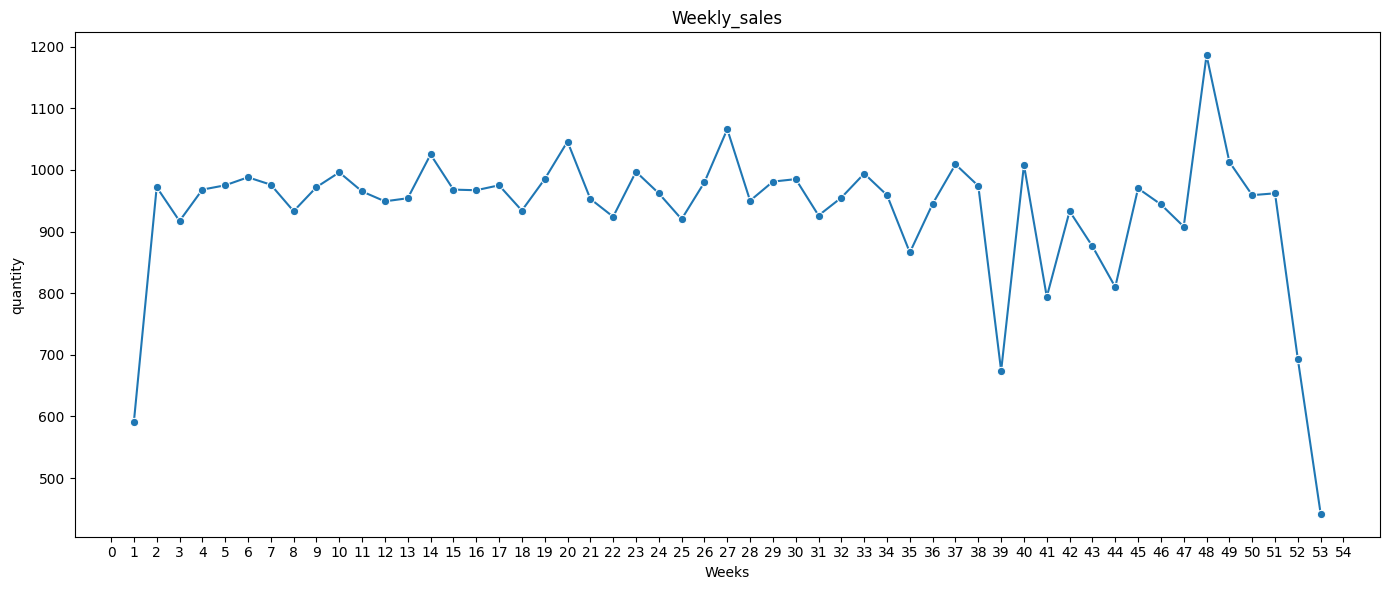

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly_sales,x='Week_of_year',y='quantity',marker='o')
plt.title('Weekly_sales')
plt.xticks(ticks=range(0,55,1))
plt.xlabel('Weeks')
plt.ylabel('quantity')
plt.tight_layout()
plt.show()

**Insights**
* Week 3 to 36 shows the relatively stable sales between 900 to 1050.
* This suggests a steady consumer demand through out the year.
* Week 48: Highest spike in sales, nearing 1200 units.
* Likely cause: Black Friday, Cyber Monday, Thanksgiving week.
* Week 0 and Week 54: Sales dip drastically to under 600 and ~450 units respectively.
* Possible reason: These may be partial weeks (start/end of year), holiday shutdowns, or cold weather impact.

**Business Implications**
* Baseline inventory and staffing can be planned based on this consistent volume.
* Prepare for high traffic with inventory surge, logistics scaling, and marketing focus during this period.
* Reduce inventory, optimize labor scheduling, and possibly run clearance campaigns to maintain cash flow.
* Opportunity to run promotions or loyalty offers to offset the dip.
* Consider seasonal promotions, discount timing, and demand forecasting around these cycles.

In [ ]:
da

In [ ]:
top10_pizza = da.groupby('pizza_name_id')['quantity'].sum().nlargest(10).reset_index()
least10_pizza = da.groupby('pizza_name_id')['quantity'].sum().nsmallest(10).reset_index()

In [ ]:
least10_pizza

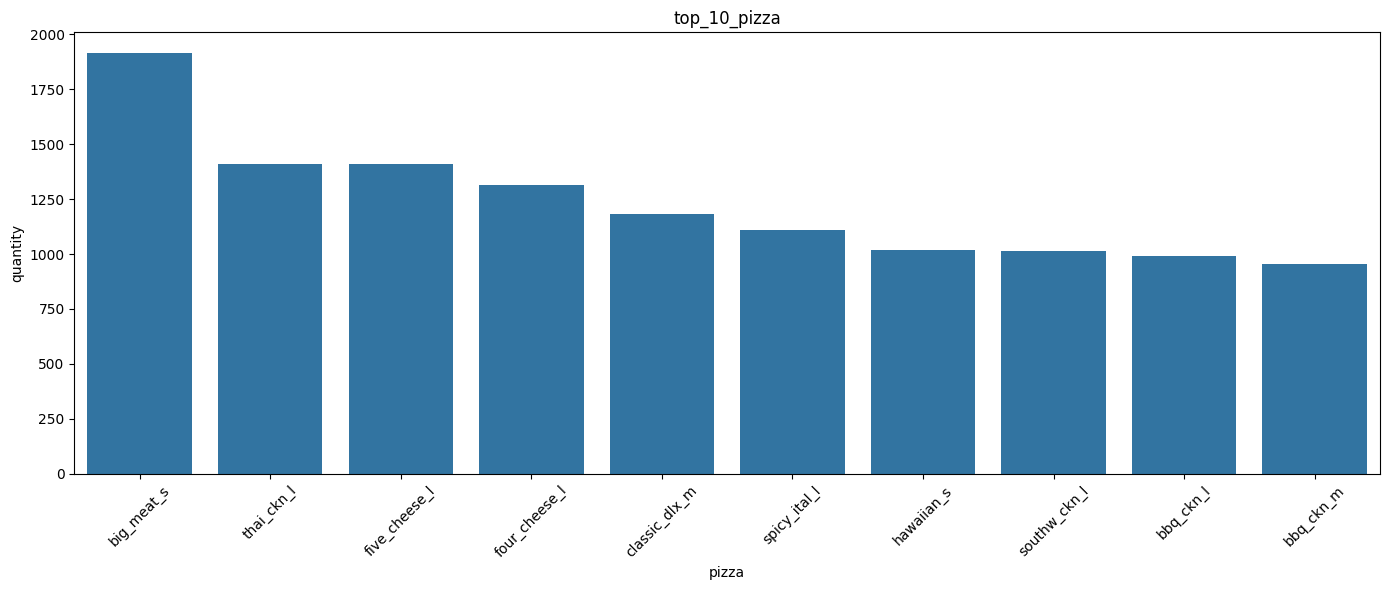

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.barplot(data=top10_pizza,x='pizza_name_id',y='quantity')
plt.title('top_10_pizza')
plt.xticks(rotation=45)
plt.xlabel('pizza')
plt.ylabel('quantity')
plt.tight_layout()
plt.show()

**OBSERVATION AND BUSINESS IMPLICATIONS**
* The BIG MEAT S is the clear fan's favourite and people choice because over 1900 quantity was sold .

**Implications**-Prioritize stock and marketing for this variant. Offer combos or promotions around it to increase basket size.

* The thai_ckn_l and five_cheese_l are nearly equal in quantity (~1400), showing a strong preference for chicken and cheese-based pizzas.

**Implications**-Ensure stable supply of chicken and cheese blends. Try bundling with sides or upsizing options.



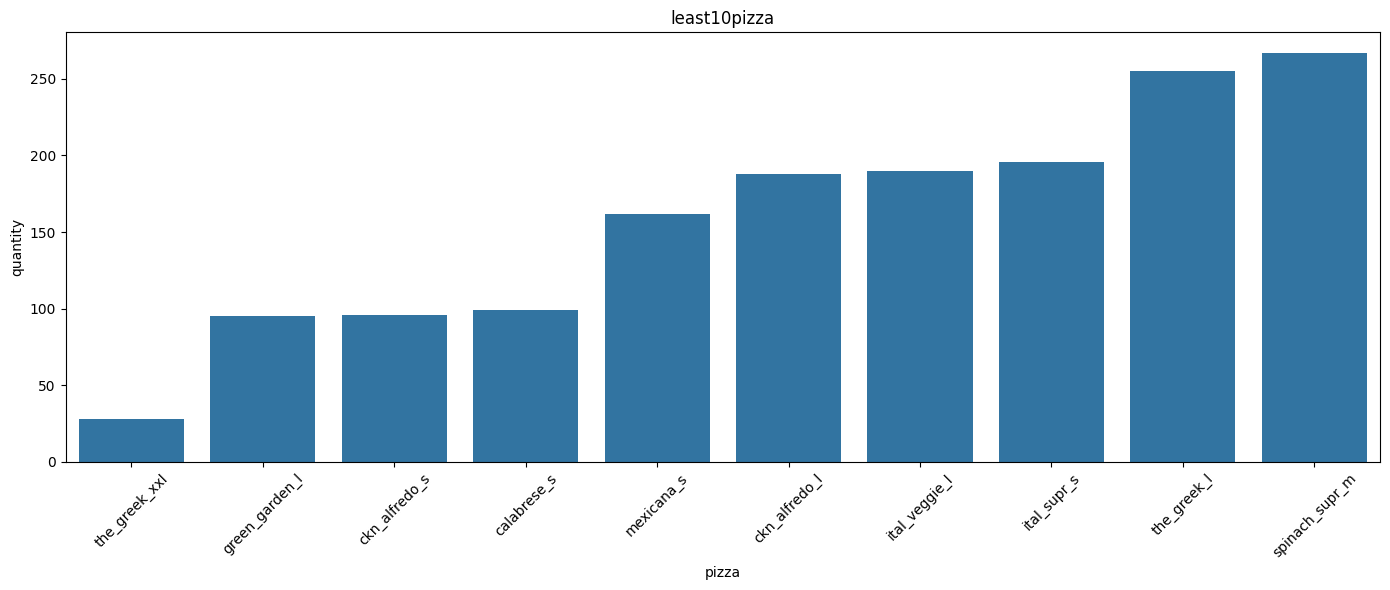

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.barplot(data=least10_pizza,x='pizza_name_id',y='quantity')
plt.title('least10pizza')
plt.xticks(rotation=45)
plt.xlabel('pizza')
plt.ylabel('quantity')
plt.tight_layout()
plt.show()

**OBSERVATIONS AND BUSINESS IMPLICATIONS**
* The greek xxl sale was 30 units, which was negligible amount and the sales is due to the size because xxl pizza are brought very rare and the greek style may not appeal widely.

**IMPLICATION** - consider rebranding or reduce the pizza price . The best option is discontinuing the pizza.
* The green_garden_l , spinach_super_m and the_greek_l are the vegeterian pizzas on the list. They are barely sold from 90 to 270 units.

**IMPLICATIONS** - Test targeted marketing for health conscious groups and could be part of a limited edition healthy range.


In [92]:
da.columns

Index(['pizza_name_id', 'quantity', 'order_date', 'dayname', 'Month',
       'day_of_week', 'Week_of_year', 'day', 'is_holiday', 'holiday_name'],
      dtype='object')

In [93]:
day_sales = da.groupby('dayname')['quantity'].sum().reset_index()

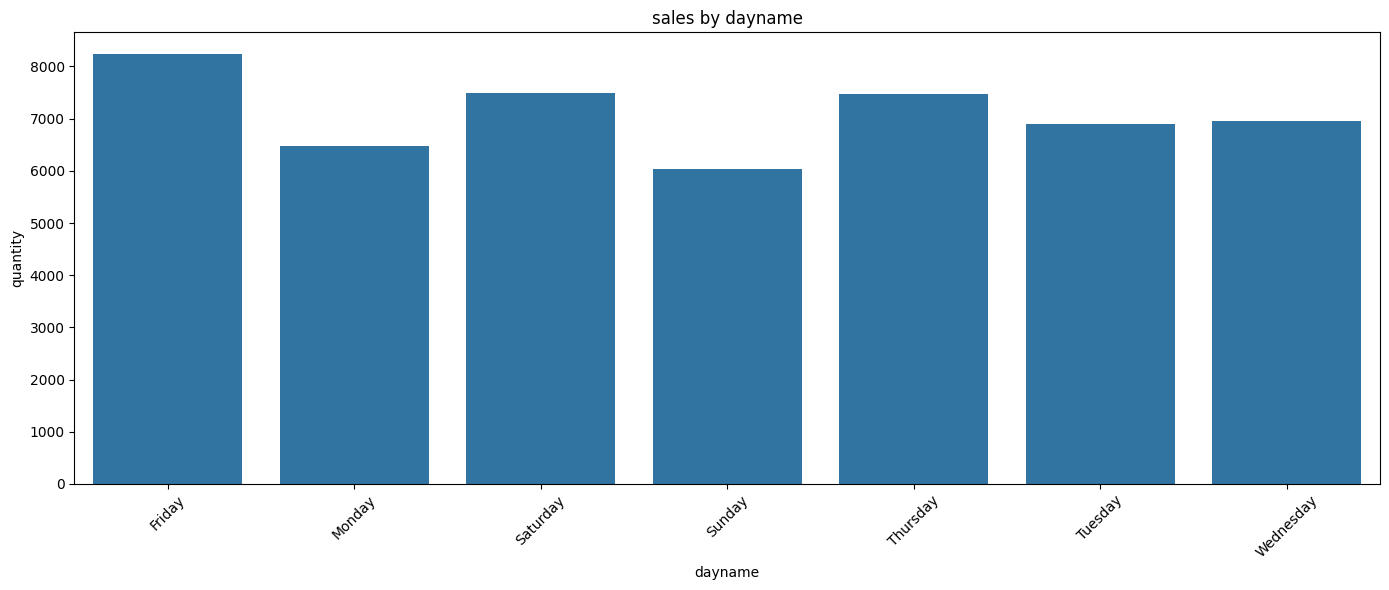

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.barplot(data=day_sales,x='dayname',y='quantity')
plt.title('sales by dayname')
plt.xticks(rotation=45)
plt.xlabel('dayname')
plt.ylabel('quantity')
plt.tight_layout()
plt.show()

**Observations and business implications**
* Highest sales day is friday and it is the clear peak in the bar. It is likely due to weekend anticipation and party nights.

**Implications** - Run friday combo deals and increase the delivery and supporting staff in friday.

* Sunday has the lowest sales and it is contradict to the weekend=high sales formula.

**Implications** - Introduce sunday family peaks and combo offers to increase the sales.

In [96]:
monthly_sales = da.groupby('Month')['quantity'].sum().reset_index()
monthly_sales

,Month,quantity
0,1,4232
1,2,3961
2,3,4261
3,4,4151
4,5,4328
5,6,4107
6,7,4392
7,8,4168
8,9,3890
9,10,3883


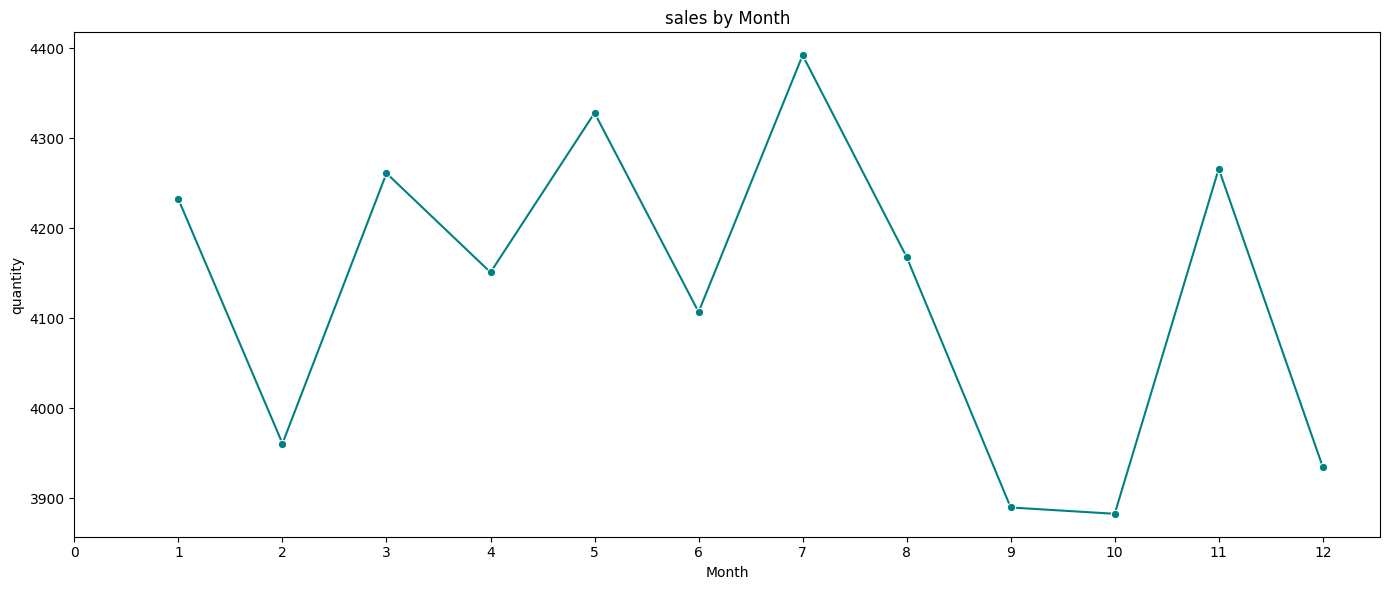

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales,x='Month',y='quantity',marker='o',color='teal')
plt.title('sales by Month')
plt.xlabel('month')
plt.ylabel('quantity')
plt.xticks(ticks=range(0,13,1))
plt.tight_layout()
plt.show()

**Observations and business implications**
* The sales are peak in july and followed by may. These could align with summer vacations, school breaks and seasonal campaigns.
* Noticeble dip in September,October and December.
* Could be due to exam season, monsoon disruption, or reduced footfall in the holiday month if people are traveling or fasting.


**Business Implications**
* Run aggressive offers in low months(Sep,Oct,Dec) to increase the sales of the respective months.
* Stock up for May and July due to their high sales.
